<a href="https://colab.research.google.com/github/Vardhan77/DeepLearningWithEVA/blob/master/EVASession3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras 

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist #The Avengers Assemble

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() #Loadin the data from mnist folder into a dataframe of training and test images.

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


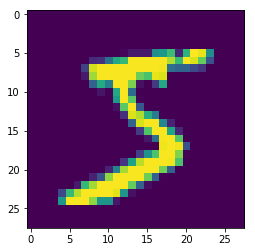

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [53]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(14, 3, 3, activation='relu', input_shape=(28,28,1))) #26

model.add(Convolution2D(18, 3, 3, activation='relu')) #24

model.add(Convolution2D(18, 3, 3, activation='relu')) #22

model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(14, 3, 3, activation='relu')) #9

model.add(Convolution2D(18, 3, 3, activation='relu')) #7

model.add(Convolution2D(18, 3, 3, activation='relu')) #5

model.add(Convolution2D(18, 1, 1, activation='relu')) #5



#model.add(Convolution2D(10, 1))

model.add(Convolution2D(10, 5)) 

#model.add(Convolution2D(10, 3))

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(14, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(18, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(18, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(14, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(18, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_

In [54]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_105 (Conv2D)          (None, 26, 26, 14)        140       
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 24, 24, 18)        2286      
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 22, 22, 18)        2934      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 11, 11, 18)        0         
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 9, 9, 14)          2282      
_________________________________________________________________
conv2d_109 (Conv2D)          (None, 7, 7, 18)          2286      
_________________________________________________________________
conv2d_110 (Conv2D)          (None, 5, 5, 18)          2934      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [56]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 12s 203us/step - loss: 0.2022 - acc: 0.9365
Epoch 2/10
60000/60000 [==============================] - 11s 188us/step - loss: 0.0682 - acc: 0.9792
Epoch 3/10
60000/60000 [==============================] - 11s 190us/step - loss: 0.0527 - acc: 0.9841
Epoch 4/10
60000/60000 [==============================] - 12s 194us/step - loss: 0.0425 - acc: 0.9864
Epoch 5/10
60000/60000 [==============================] - 11s 188us/step - loss: 0.0365 - acc: 0.9889
Epoch 6/10
60000/60000 [==============================] - 11s 189us/step - loss: 0.0322 - acc: 0.9898
Epoch 7/10
60000/60000 [==============================] - 12s 197us/step - loss: 0.0287 - acc: 0.9910
Epoch 8/10
60000/60000 [==============================] - 11s 186us/step - loss: 0.0256 - acc: 0.9918
Epoch 9/10
60000/60000 [==============================] - 11s 186us/step - loss: 0.0230 - acc: 0.9925
Epoch 10/10
60000/60000 [==============================] - 11s 187us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [58]:
print(score)

[0.03208230428835231, 0.9909]


In [0]:
y_pred = model.predict(X_test)

In [60]:
print(y_pred[:9])
print(y_test[:9])

[[1.23363689e-11 1.07815321e-13 1.15183646e-07 7.53561924e-09
  2.44284090e-15 4.41224704e-12 1.36346621e-18 9.99999881e-01
  4.94079944e-10 1.59456661e-08]
 [4.34724236e-11 3.11660209e-08 1.00000000e+00 1.79421527e-08
  9.65764014e-12 1.00832916e-12 1.57340345e-08 2.79438287e-14
  5.03889208e-10 5.60132704e-11]
 [1.96612684e-10 9.99959469e-01 1.95702250e-06 1.52254620e-09
  5.17525586e-06 9.36859487e-06 1.32670050e-06 1.18361040e-05
  1.06454199e-05 2.74455147e-07]
 [9.99979377e-01 3.04671869e-12 8.25597013e-09 5.63796505e-07
  2.44688186e-10 1.28085060e-06 1.54833488e-05 7.18920701e-10
  1.99179070e-07 3.03302704e-06]
 [9.49695669e-11 1.24199468e-12 4.90404245e-11 2.09373773e-12
  9.99992847e-01 3.76757248e-09 1.04418881e-07 1.58963953e-11
  1.01760037e-07 6.96135885e-06]
 [7.36693692e-11 9.99940991e-01 4.64400074e-07 1.40651463e-10
  1.06549132e-05 8.79014763e-08 3.75640106e-08 3.40224105e-05
  1.30978451e-05 6.65185553e-07]
 [8.74319180e-20 6.83604950e-09 3.34478834e-11 2.24614901e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

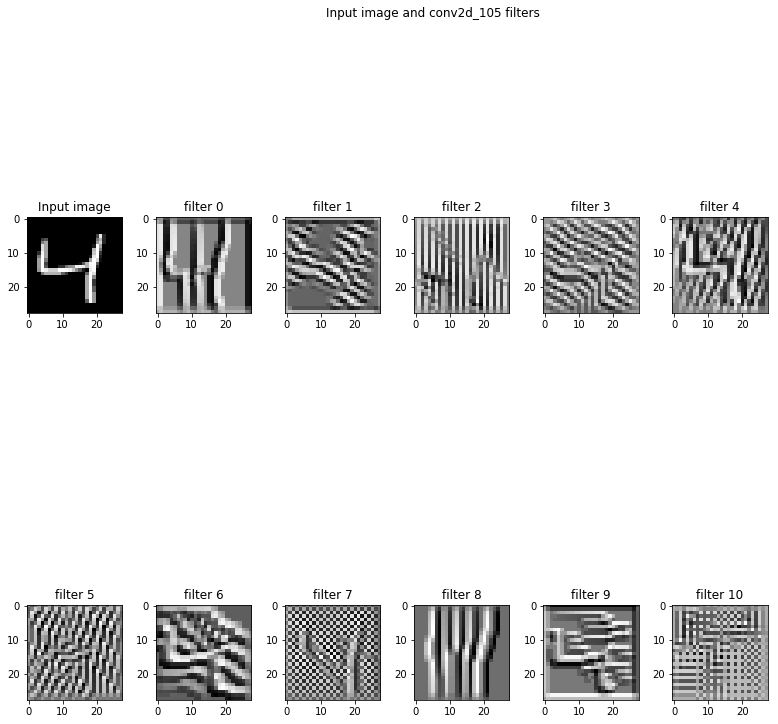

In [62]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_105'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

1st Try :

Tried going deeper into the network. 
Added layers of (convolutions of 3,3 followed by convolutions of 1,1).

Kept the number of parameters upto 30k.(reduced it by half).

Observation: 1. Val Acc - reduced by 0.10%
                        2. First Training epoch accuracy had increase of 1%.
                        
             
2nd Try:

Will go more deeper and reduce the number of parameters.
Added more 3,3 and 1,1.
No max pool yet

Observation: 1. Val Acc increased by 0.2%.
                        2. first Training epoch accuracy decresed by 5%
                        3.overfitting slight
3rd try :
Will go more deeper and reduce the number of parameters.
Added more 3,3 and 1,1.
No max pool yet
Parameter- 50k
Observation: 1. Val Acc decreased by 2%.
                        2. first Training epoch accuracy decresed by 15%.
                        3. there's overfitting
                        
 4th try: Removed few 1,1 convolutions.
 No max pool.
 Parameter 49k.
 Observation: 1. Val Acc - 98.62%
                          2. First training accuracy was 80% around.
                          3. No overfitiing.
                          
  side note- i think first training accuracy of the network should be bad for the network to not overfit.
  Also Pyramid networks wont work the best.
  
  
  So finally going basic.
  
  Add Conv - Conv - Max Pool.
  Reduce number of channels.
  Got 17k parameters.
  Accuracy aint that bad. Validation Goes upto 99.05.
  While training accuracy lingers around 99.5%.
  
  